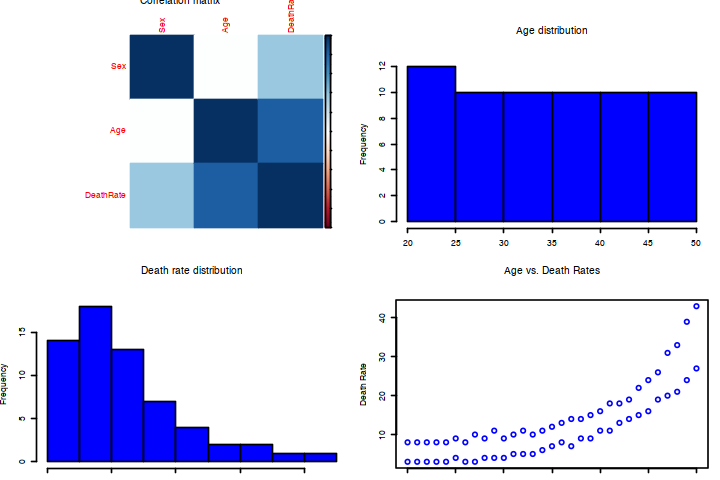

In [2]:
#Install package to plot correlation matrix
#install.packages("corrplot")
library(glue)
library(ggplot2)
#general R custom data loader function
data_loader <-function(file_path,separator,head=TRUE){
  
  return(read.table(file_path,sep=separator,header = head))
}

corr_arr <- function(a,b){
  
  corr = 0
  a_bar <-  sum(a)/length(a)
  
  b_bar <- sum(b)/length(b)
  
  var_a  =  sum((a - a_bar)^2)/(length(a) - 1)
  
  var_b  =  sum((b - b_bar)^2)/(length(b) - 1)
  
  covar_a_b =  sum((a -  a_bar) * (b -  b_bar))/ (length(b) - 1)
  
  corr = covar_a_b/sqrt(var_a * var_b)
  return(corr)
}
data <-  data_loader("death_rates.csv",",")

female_data = data[data$Sex == "F",]
male_data = data[data$Sex == "M",]

display_correlation  <-  function(female_data){
  #we are encoding the sex feature (F,M) -> (1,2)
  data$Sex = as.numeric(factor(data$Sex,levels = c("F","M"),labels = c(1, 2)))
  result <- matrix(, nrow = ncol(data), ncol =ncol(data))
  for (i in  1:ncol(data)){
    for (j in 1:ncol(data)){
      result[i,j] <- corr_arr(data[,i],data[,j])
    }
  }
  colnames(result) <- colnames(data)
  rownames(result) <- colnames(data)
  return(result)
}


#Task 1 Undertake a descriptive analysis of the variables in this dataset. 
res <-  display_correlation(data)
options(repr.plot.width=6, repr.plot.height=4)
par(mfrow=c(2,2))
# make labels and margins smaller
par(cex=0.4,mai=c(0.1,0.3,0.5,0.1))
corrplot::corrplot(res,method="color",title="Correlation matrix")
hist(data$Age,main = "Age distribution",ylab = "Frequency",xlab = "Age",col="blue")


hist(data$DeathRate,main = "Death rate distribution",ylab = "Frequency",xlab = "Data Rate",col="blue")

plot(data$Age,data$DeathRate, col="blue",xlab="Age",ylab = "Death Rate",main = glue("Age vs. Death Rates"))



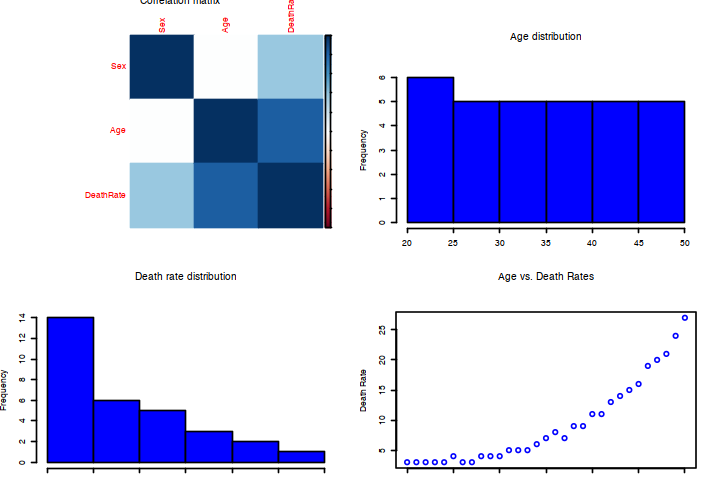

In [6]:
#Task 2 Explore (and comment on) the association between Death rates and Age, separately for males and females.

#Task 2.1 For Females 
res <-  display_correlation(female_data)
par(mfrow=c(2,2))
# make labels and margins smaller
par(cex=0.4,mai=c(0.1,0.3,0.6,0.2))

corrplot::corrplot(res,method="color",title="Correlation matrix")

hist(female_data$Age,main = "Age distribution",ylab = "Frequency",xlab = "Age",col="blue")


hist(female_data$DeathRate,main = "Death rate distribution",ylab = "Frequency",xlab = "Data Rate",col="blue")

plot(female_data$Age,female_data$DeathRate, col="blue",xlab="Age",ylab = "Death Rate",main = glue("Age vs. Death Rates"))


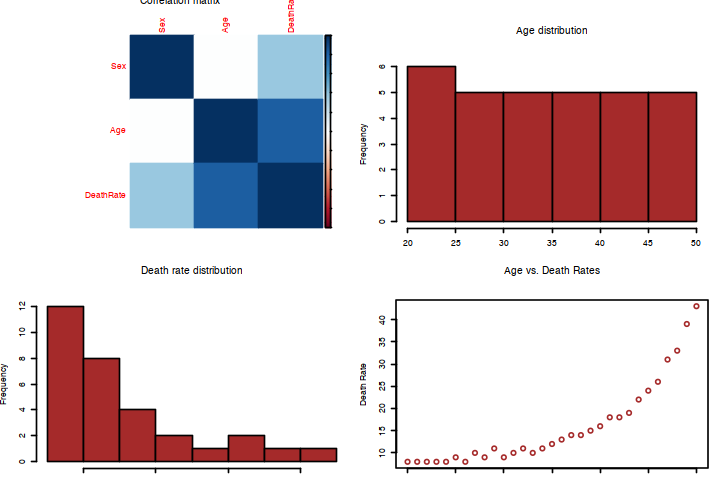

In [11]:
#Task 2.2 for Males
res <-  display_correlation(male_data)
par(mfrow=c(2,2))
# make labels and margins smaller
par(cex=0.4,mai=c(0.1,0.3,0.5,0.1))
corrplot::corrplot(res,method="color",title="Correlation matrix")

hist(male_data$Age,main = "Age distribution",ylab = "Frequency",xlab = "Age",col="brown")


hist(male_data$DeathRate,main = "Death rate distribution",ylab = "Frequency",xlab = "Data Rate",col="brown")

plot(male_data$Age,male_data$DeathRate, col="brown",xlab="Age",ylab = "Death Rate",main = glue("Age vs. Death Rates"))


In [12]:
#Task 3 Build a simple linear regression model to explain the death rates of females as a function of age
linear_regression <-function(x,y){
  x_bar =   sum(x)/ length(x)
  y_bar =  sum(y)/length(y)
  beta_1 =  sum((x - x_bar) * y)/ sum((x - x_bar)^2)
  
  beta_0 = y_bar -  beta_1 * x_bar
  return(list(beta_0,beta_1))
}

In [13]:
#Task 4 Use the estimated parameters of your model in 3) to predict the death rate of females aged 51.
betas =  linear_regression(female_data$Age,female_data$DeathRate)
beta_0 = betas[[1]]

beta_1 = betas[[2]]

regressor <- function(x,beta_0,beta_1){
  return(beta_0 + beta_1 * x)
}

x <- 51
print(regressor(x,beta_0,beta_1))

[1] 20.66452


In [14]:
pred  = regressor(female_data$Age,beta_0,beta_1)

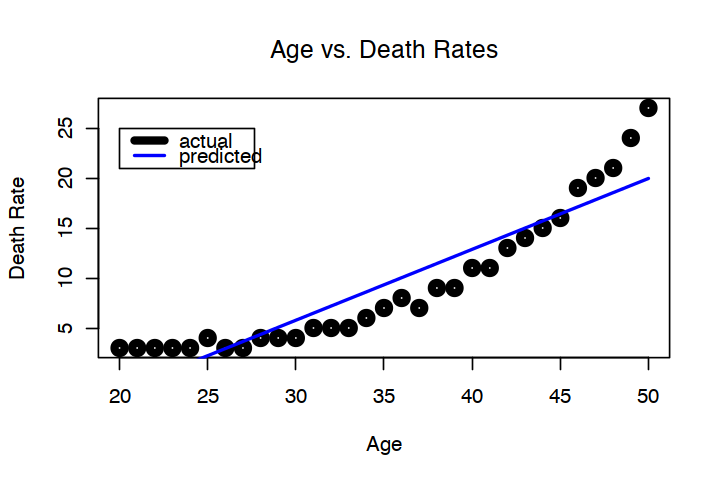

In [32]:
plot(female_data$Age,female_data$DeathRate, col="black", lwd=5, xlab="Age", ylab="Death Rate")
lines(female_data$Age, pred, col="blue", lwd=2)
title("Age vs. Death Rates")
legend(20,25,c("actual","predicted"), lwd=c(5,2), col=c("black","blue"), y.intersp=1.5)